In [1]:
#libraries
import numpy as np
import streamlit
import pandas as pd
from datetime import datetime
import re
import sys
import sklearn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt
import seaborn as sns
import sklearn.metrics as sm

In [2]:
#version of library and system used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
#print('pyplot: {}'.format(pl.__version__))
print('re: {}'.format(re.__version__))
print('scikit-learn {}.'.format(sklearn.__version__))


Python: 3.8.3
numpy: 1.18.5
pandas: 1.0.5
re: 2.2.1
scikit-learn 0.23.1.


In [3]:
weather = pd.read_csv("weather.Ulsan.6hr.1980-2017.csv")
weather.drop(weather.index[0:54060],0,inplace=True)
weather.head()

,time,temperature,precipitation,wind_speed,wind_direction,humadity,pressure
54060,2017010100,3.8,0.0,2.7,323.5,70.2,1028.5
54061,2017010106,5.1,0.0,0.7,350.3,64.0,1028.8
54062,2017010112,10.1,0.0,1.7,64.9,45.8,1026.5
54063,2017010118,6.2,0.0,1.8,313.4,63.0,1024.9
54064,2017010200,4.1,0.0,1.4,334.9,74.0,1022.5


In [4]:
weather.columns = list(map(lambda x: re.sub(" \[.*\]","",x) ,weather.columns))
weather.time = weather.time.map(lambda x:datetime.strptime(str(x),"%Y%m%d%H"))
weather

,time,temperature,precipitation,wind_speed,wind_direction,humadity,pressure
54060,2017-01-01 00:00:00,3.8,0.0,2.7,323.5,70.2,1028.5
54061,2017-01-01 06:00:00,5.1,0.0,0.7,350.3,64.0,1028.8
54062,2017-01-01 12:00:00,10.1,0.0,1.7,64.9,45.8,1026.5
54063,2017-01-01 18:00:00,6.2,0.0,1.8,313.4,63.0,1024.9
54064,2017-01-02 00:00:00,4.1,0.0,1.4,334.9,74.0,1022.5
...,...,...,...,...,...,...,...
55515,2017-12-30 18:00:00,7.0,0.0,2.0,334.9,73.0,1020.9
55516,2017-12-31 00:00:00,6.2,0.0,2.4,289.3,65.3,1018.0
55517,2017-12-31 06:00:00,5.2,0.0,3.8,316.8,55.2,1019.2
55518,2017-12-31 12:00:00,6.1,0.0,4.4,315.1,26.2,1020.0


In [5]:
weather["time"]=list(range(len(weather))) 

In [6]:
#define parameters 
X = weather[['time', "wind_speed","humadity","pressure","wind_direction"]]
y = weather['temperature']
cols = ["time","wind_speed","humadity","pressure","precipitation"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=3)

In [8]:
x_train

,time,wind_speed,humadity,pressure,wind_direction
54807,747,1.2,91.2,1010.0,141.8
54767,707,1.4,93.7,1009.4,56.9
54167,107,1.9,20.3,1025.9,339.1
54714,654,2.7,60.5,1013.7,149.8
54350,290,3.1,62.8,1015.0,53.3
...,...,...,...,...,...
54849,789,2.2,67.0,1011.9,243.4
54316,256,2.5,55.2,1010.2,330.0
55028,968,2.7,71.0,1011.2,340.0
55012,952,1.3,81.2,1015.3,323.3


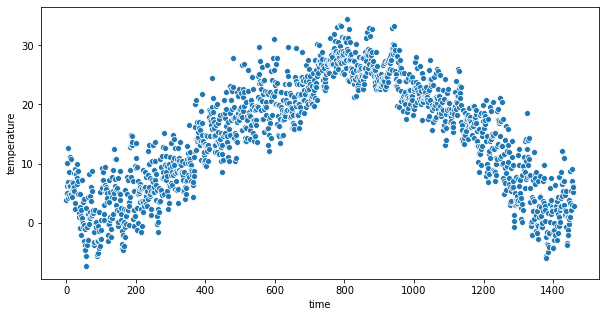

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel('time')
plt.ylabel('temperature')
sns.scatterplot(weather['time'],weather['temperature'])
plt.show()

In [10]:

#kernels

k1 = RationalQuadratic(alpha = 0.1, length_scale = 1)
k2 = RationalQuadratic(alpha = 0.1, length_scale = 0.5)
k3 = RationalQuadratic(alpha = 2, length_scale = 0.5)
k4 = ExpSineSquared(length_scale = 0.1, periodicity = 5)
k5 = Matern(length_scale=1.1, nu=3 / 2)
k6 = Matern(length_scale=1.1, nu=5 / 2)
k7 = RBF(length_scale = 1)
k8 = RBF(length_scale = 0.1)
k9 = RBF(length_scale = 0.1)*RationalQuadratic(alpha = 0.1, length_scale = 0.5)
k10= ConstantKernel(1.0, (1e-3, 1e3))*(RBF([1. for _ in cols], (1e-5, 10))+ConstantKernel(1.0, (1e-3, 1e3)) + DotProduct()) 
#RBF([.1, .1, .1, .1, .1, .1], (1e-5, 10))#

In [11]:
gp = GaussianProcessRegressor(kernel=k9, n_restarts_optimizer=9)

In [12]:
gp?


In [13]:
gp.fit(x_train,y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=0.1) * RationalQuadratic(alpha=0.1, length_scale=0.5),
                         n_restarts_optimizer=9)

In [14]:
x_test

,time,wind_speed,humadity,pressure,wind_direction
54200,140,1.7,82.7,1013.4,292.6
55010,950,2.3,40.7,1012.1,38.2
54308,248,1.3,52.7,1018.4,339.7
55420,1360,0.6,66.5,1022.7,325.3
54628,568,0.5,98.0,1013.4,302.0
...,...,...,...,...,...
55025,965,2.6,57.8,1012.7,346.6
54748,688,1.2,87.8,1008.5,294.9
54125,65,0.9,41.2,1031.3,336.6
55362,1302,2.0,39.5,1015.4,219.5


In [15]:

#2.65**2 * RBF(length_scale=[4.03, 10, 10, 10]) + 2.55**2 + DotProduct(y_std_0=14.3) : kernel result

predicted_temperature, y_std = gp.predict(x_test, return_std=True)
origin_temperature = pd.Series(y_test)
predicted_temperature = pd.Series(predicted_temperature)
origin_temperature.to_csv("origin_temperature.csv",index=False,header=None)
predicted_temperature.to_csv("predicted_temperature.csv",index=False,header=None)



In [16]:
origin_temperature = pd.read_csv("origin_temperature.csv",header=None)
predicted_temperature = pd.read_csv("predicted_temperature.csv",header=None)
origin_temperature

,0
0,7.4
1,28.2
2,5.2
3,0.9
4,15.4
...,...
141,21.3
142,19.5
143,0.8
144,12.4


In [17]:
predicted_temperature

,0
0,4.680914
1,24.882756
2,5.324836
3,4.711075
4,17.269977
...,...
141,21.826568
142,21.549048
143,0.371808
144,11.053373


In [18]:
df2 = pd.DataFrame({'Actual': origin_temperature[0].describe(), 'Predicted': predicted_temperature[0].describe()})
df2


,Actual,Predicted
count,146.000000,146.000000
mean,13.971918,14.469053
std,9.662196,8.978454
min,-4.900000,-1.136552
25%,5.825000,6.017266
50%,14.250000,15.623304
75%,22.600000,22.333407
max,33.200000,29.653810


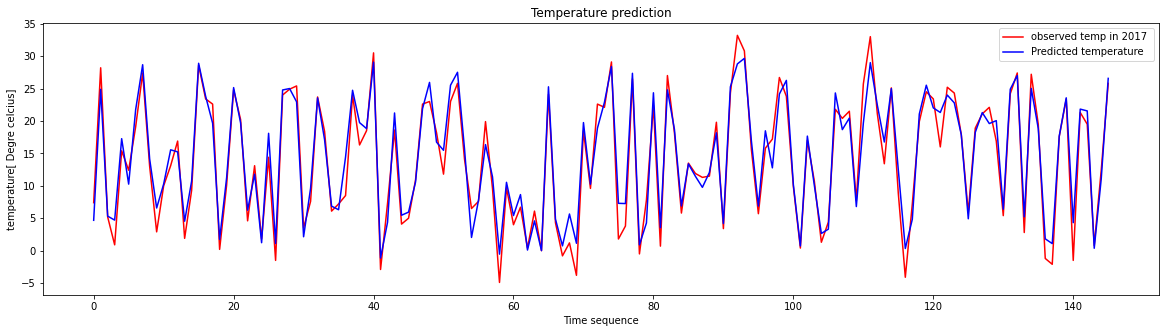

In [19]:
# visualizing the whole training data results
train_size=len(x_train)
fig = plt.figure(figsize=[20,5])
ax = fig.add_subplot(1,1,1)
plt.plot(origin_temperature, color = 'red', label = 'observed temp in 2017 ')
plt.plot(predicted_temperature, color = 'blue', label = 'Predicted temperature')
plt.title('Temperature prediction')
plt.xlabel('Time sequence')
plt.ylabel('temperature[ Degre celcius]')
plt.legend()
plt.show()

In [20]:

print("Mean absolute error =", round(sm.mean_absolute_error(origin_temperature, predicted_temperature), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(origin_temperature, predicted_temperature), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(origin_temperature , predicted_temperature), 2)) 


Mean absolute error = 1.81
Median absolute error = 1.39
Explain variance score = 0.95


In [21]:
print("scikit-learn")
print("test set>")
print("\t", "MSE: ", sm.mean_squared_error(origin_temperature, predicted_temperature))
print("\t", "RMSE: ", np.sqrt(sm.mean_squared_error(origin_temperature, y_test,squared=False)))
print("\t", "r2 score: ", sm.r2_score(origin_temperature, y_test),)

scikit-learn
test set>
	 MSE:  5.237683052532413
	 RMSE:  0.0
	 r2 score:  1.0


In [23]:
predicted_temperature


,0
0,4.680914
1,24.882756
2,5.324836
3,4.711075
4,17.269977
...,...
141,21.826568
142,21.549048
143,0.371808
144,11.053373
